## Wholesale Dataset
### To use various clustering techniques to segment customers
1) FRESH: annual spending on fresh products (Continuous); 

2) MILK: annual spending on milk products (Continuous); 

3) GROCERY: annual spending on grocery products (Continuous); 

4) FROZEN: annual spending on frozen products (Continuous) 

5) DETERGENTS_PAPER: annual spending on detergents and paper products (Continuous) 

6) DELICATESSEN: annual spending on and delicatessen products (Continuous); 

7) CHANNEL: customer Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal) 

8) REGION: customer Region Lisnon, Oporto or Other (Nominal) 


In [1]:
# Importing necessary libraries 
import numpy as np
import pandas as pd
from IPython.display import display 

%matplotlib inline
import seaborn as sns

from __future__ import print_function
from patsy import dmatrices

In [2]:
# Load the wholesale customers dataset
data = pd.read_csv("Q04_Wholesale+customers+data.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
#seperating continous varibale to show the effects and for later use
raw=data.iloc[:,2:]

## Data Exploration

In [4]:
data.shape

(440, 8)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


We can observe there are no missing values and every column is in int datatype

But Channel and Region are nominal columns which can't be clustered.

CHANNEL: customer Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel

REGION: customer Region Lisnon, Oporto or Other

But after dummying and PCA we can use this data to cluster

In [6]:
#checking channel unique values
data.Channel.unique()

array([2, 1], dtype=int64)

In [7]:
#checking region unique values
data.Region.unique()

array([3, 1, 2], dtype=int64)

In [8]:
# Display a description of the dataset
display(data.describe())

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


We can oberve outliers as max values are suddenly increasing

# EDA

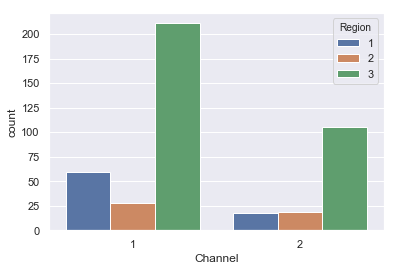

In [9]:
sns.set()
sns.countplot(data=data,x='Channel',hue='Region')

We can observe in both channels 3rd region has more weightage

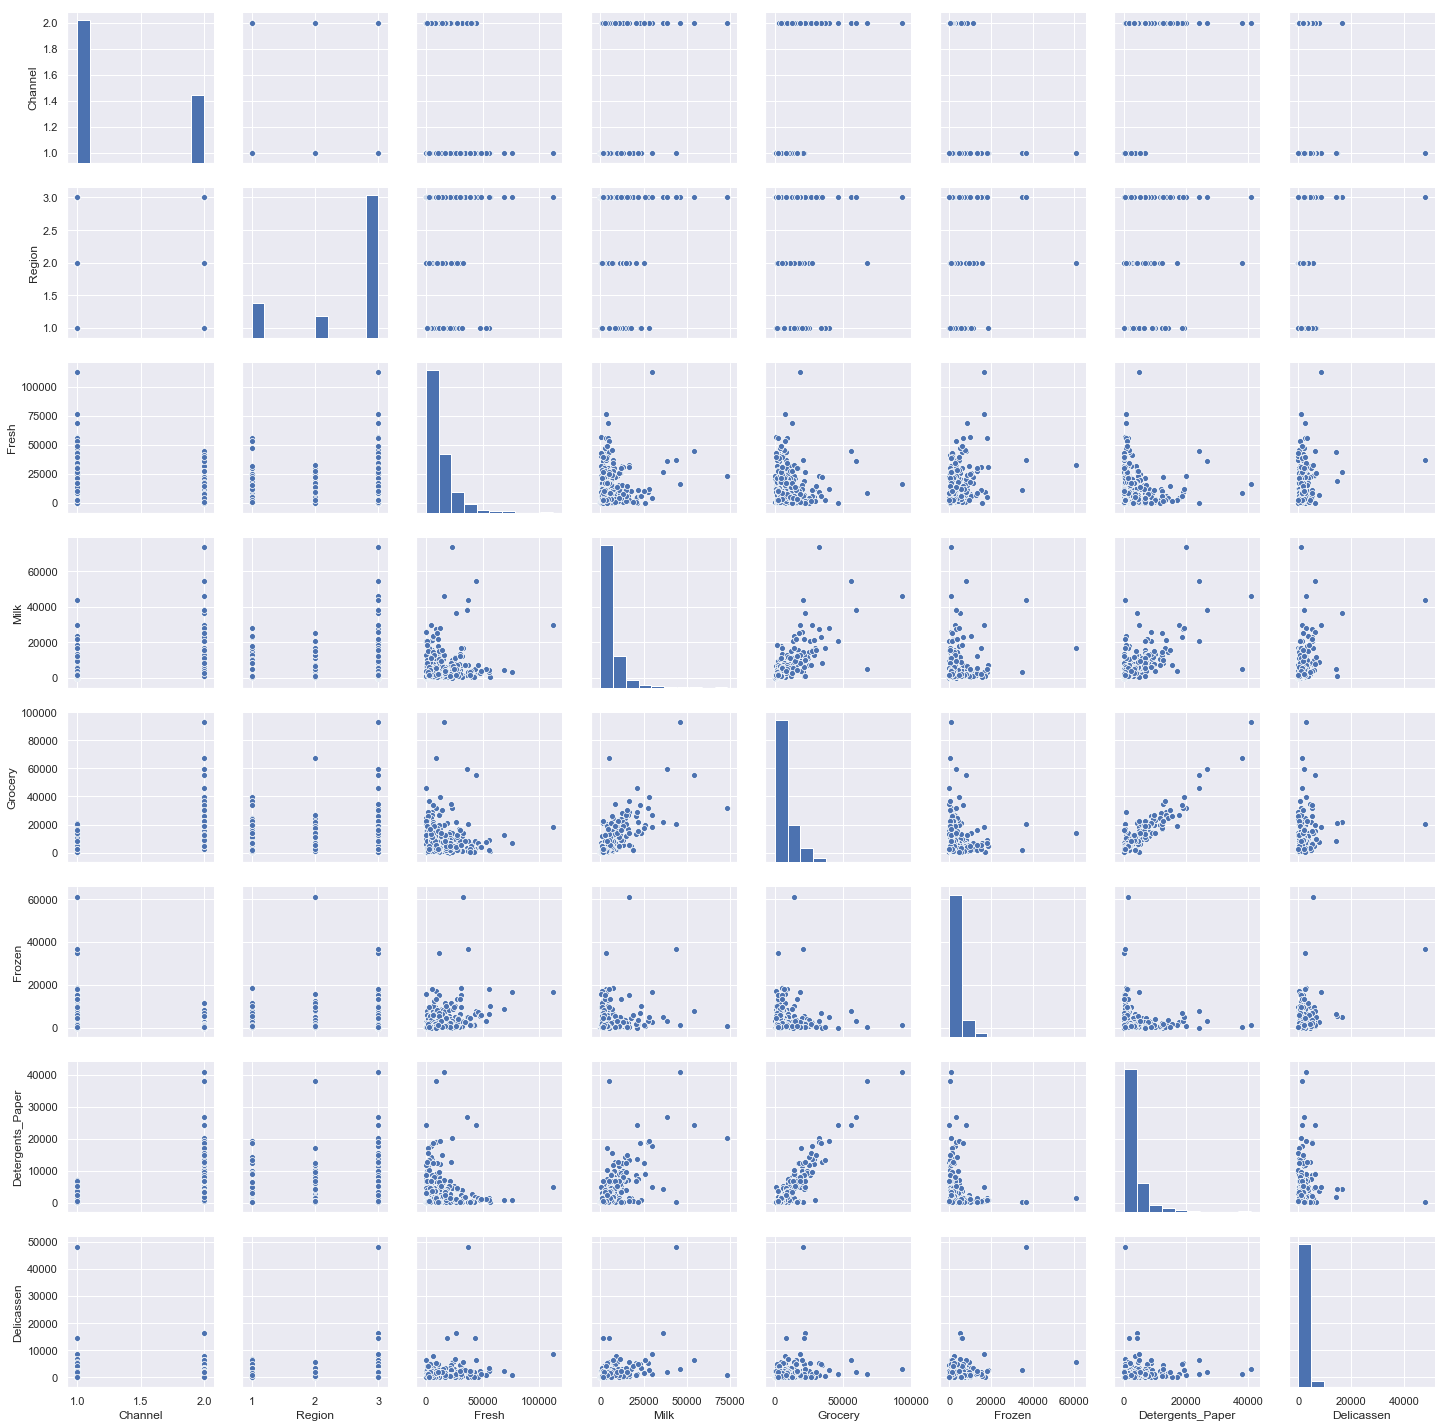

In [10]:
#pair plot
sns.pairplot(data=data)

Here we can observe multicolinearity and Skewness which means outliers which we'll treat later

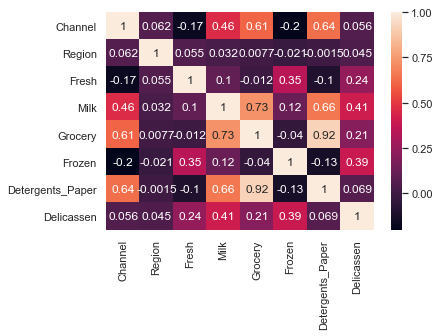

In [11]:
# Ploting correlation plot
import matplotlib.pyplot as plt
plt.figure()
sns.heatmap(data.corr(),annot = True)

From heat map also we can see multicolinearity between the features

# Outlier Detection & Treatment

C:\Users\Krishna Murthy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


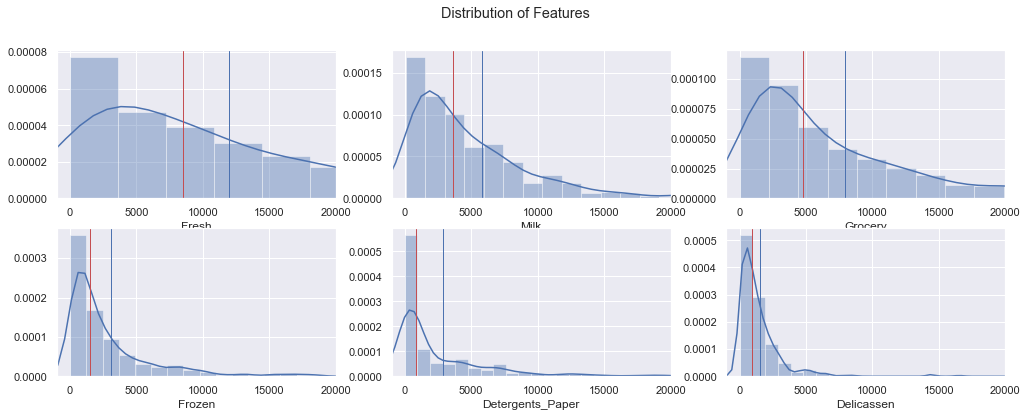

In [12]:
#using loop contructing histogram for all features.
#red line is median and blue is mean margin 
fig, axes = plt.subplots(2, 3)
axes = axes.flatten()
fig.set_size_inches(17, 6)
fig.suptitle('Distribution of Features')
for i, col in enumerate(raw.columns):
    feature = raw[col]
    sns.distplot(feature, label=col, ax=axes[i]).set(xlim=(-1000, 20000),);
    axes[i].axvline(feature.mean(),linewidth=1);
    axes[i].axvline(feature.median(),linewidth=1, color='r');

In [13]:
# We can notice the right skewness

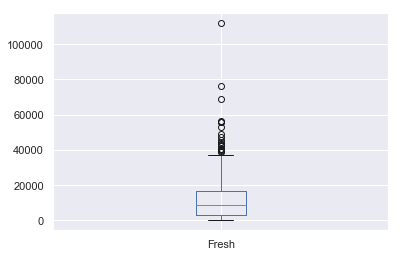

In [14]:
#lets check the outliers
data.Fresh.plot(kind='box') 
#it has too many outliers.

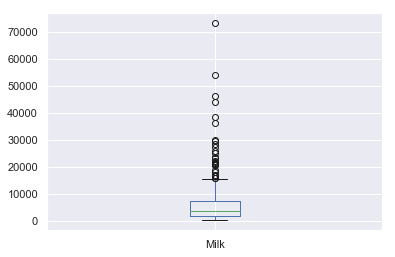

In [15]:
#lets check the outliers
data.Milk.plot(kind='box') 
#it has too many outliers.

In [16]:
data['Milk'].describe()

count      440.000000
mean      5796.265909
std       7380.377175
min         55.000000
25%       1533.000000
50%       3627.000000
75%       7190.250000
max      73498.000000
Name: Milk, dtype: float64

## Feature Scaling

In [17]:
#let's transform these features using log and see is there any skewness.
#converting rawdata into log
log = np.log(data)
log.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.693147,1.098612,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,0.693147,1.098612,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,0.693147,1.098612,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,0.000000,1.098612,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,0.693147,1.098612,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525


In [18]:
log1= np.log(raw)

In [19]:
#applied zscore for pca
from scipy.stats import zscore
log_raw=log.apply(zscore)
log_raw.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.565896,0.484561,0.976070,0.439132,-1.508418,0.643001,0.407685
1,1.448652,0.565896,0.088766,0.990718,0.650291,0.134683,0.764127,0.623967
2,1.448652,0.565896,0.017680,0.890970,0.453606,0.377147,0.802243,1.758420
3,-0.690297,0.565896,0.515656,-0.957573,-0.083722,1.140446,-0.324282,0.629110
4,1.448652,0.565896,0.876512,0.439720,0.395003,0.756909,0.405285,1.442246


C:\Users\Krishna Murthy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


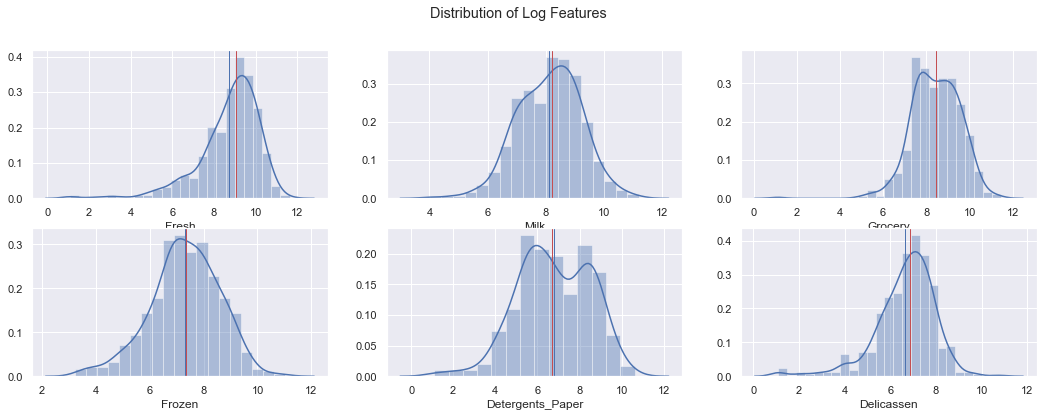

In [20]:
fig, axes = plt.subplots(2, 3)
axes = axes.flatten()
fig.set_size_inches(18, 6)
fig.suptitle('Distribution of Log Features')

for i, col in enumerate(log1.columns):
    feature = log1[col]
    sns.distplot(feature, label=col, ax=axes[i])
    axes[i].axvline(feature.mean(),linewidth=1)
    axes[i].axvline(feature.median(),linewidth=1, color='r')


In [21]:
# After log transformation the features are converted to almost normal distibution.

C:\Users\Krishna Murthy\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


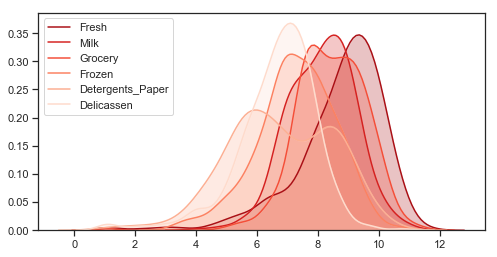

In [22]:
# compare log-transformed features with each other (credit to reviewer)
import matplotlib.pyplot as plt
import seaborn as sns
# set plot style & color scheme
sns.set_style('ticks')
with sns.color_palette("Reds_r"):
    # plot densities of log data
    plt.figure(figsize=(8,4))
    for col in raw.columns:
        sns.kdeplot(log1[col], shade=True)
    plt.legend(loc='best')

After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before)

### Treatment of outliers

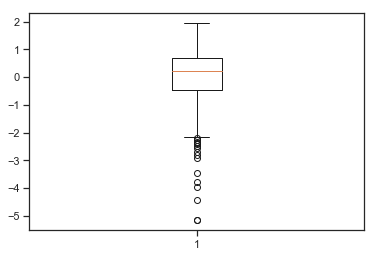

In [23]:
# outlier treatment for Fresh
plt.boxplot(log_raw.Fresh)
Q1 = log_raw.Fresh.quantile(0.25)
Q3 = log_raw.Fresh.quantile(0.75)
IQR = Q3 - Q1
log_raw = log_raw[(log_raw.Fresh >= Q1 - 1.5*IQR) & (log_raw.Fresh <= Q3 + 1.5*IQR)]

Removing outliers using IQR method 

{'whiskers': [<matplotlib.lines.Line2D at 0x252a381e080>,
 'caps': [<matplotlib.lines.Line2D at 0x252a3866390>,
 'boxes': [<matplotlib.lines.Line2D at 0x252a381ef28>],
 'medians': [<matplotlib.lines.Line2D at 0x252a3874940>],
 'fliers': [<matplotlib.lines.Line2D at 0x252a3874ac8>],
 'means': []}

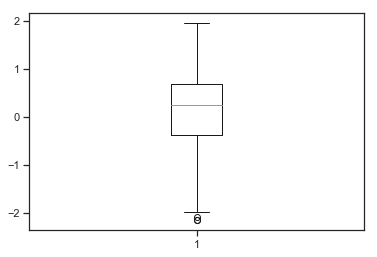

In [24]:
plt.boxplot(log_raw.Fresh)

Now we can observe a reduced outliers

Doing the same for remaining features

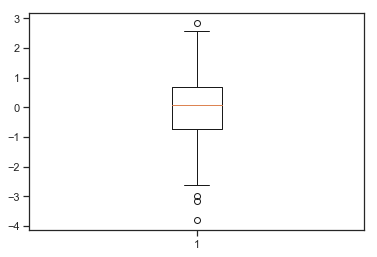

In [25]:
# outlier treatment for Milk
plt.boxplot(log_raw.Milk)
Q1 = log_raw.Milk.quantile(0.25)
Q3 = log_raw.Milk.quantile(0.75)
IQR = Q3 - Q1
log_raw = log_raw[(log_raw.Milk >= Q1 - 1.5*IQR) & (log_raw.Milk <= Q3 + 1.5*IQR)]

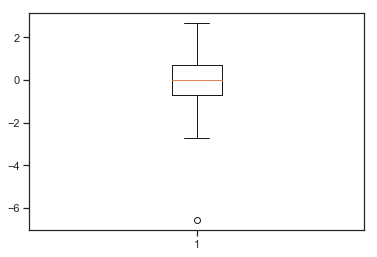

In [26]:
# outlier treatment for Grocery
plt.boxplot(log_raw.Grocery)
Q1 = log_raw.Grocery.quantile(0.25)
Q3 = log_raw.Grocery.quantile(0.75)
IQR = Q3 - Q1
log_raw = log_raw[(log_raw.Grocery >= Q1 - 1.5*IQR) & (log_raw.Grocery <= Q3 + 1.5*IQR)]

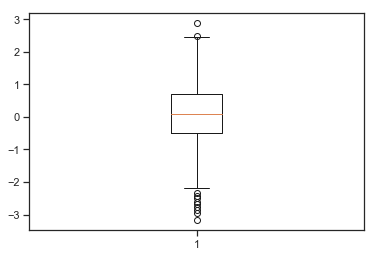

In [27]:
# outlier treatment for Frozen
plt.boxplot(log_raw.Frozen)
Q1 = log_raw.Frozen.quantile(0.25)
Q3 = log_raw.Frozen.quantile(0.75)
IQR = Q3 - Q1
log_raw = log_raw[(log_raw.Frozen >= Q1 - 1.5*IQR) & (log_raw.Frozen <= Q3 + 1.5*IQR)]

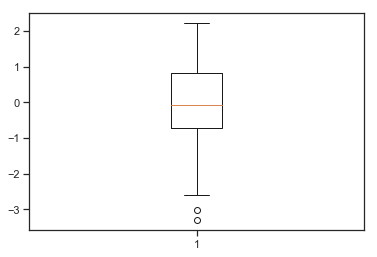

In [28]:
# outlier treatment for Detergents_Paper
plt.boxplot(log_raw.Detergents_Paper)
Q1 = log_raw.Detergents_Paper.quantile(0.25)
Q3 = log_raw.Detergents_Paper.quantile(0.75)
IQR = Q3 - Q1
log_raw = log_raw[(log_raw.Detergents_Paper >= Q1 - 1.5*IQR) & (log_raw.Detergents_Paper <= Q3 + 1.5*IQR)]

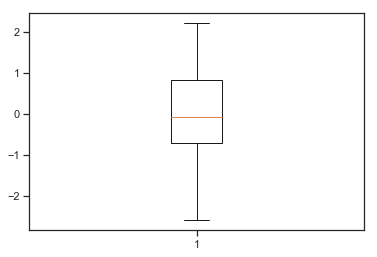

In [29]:
# outlier treatment for Delicassen
plt.boxplot(log_raw.Detergents_Paper)
Q1 = log_raw.Delicassen.quantile(0.25)
Q3 = log_raw.Delicassen.quantile(0.75)
IQR = Q3 - Q1
log_raw = log_raw[(log_raw.Delicassen >= Q1 - 1.5*IQR) & (log_raw.Delicassen <= Q3 + 1.5*IQR)]

In [30]:
log_raw.shape

(394, 8)

In [31]:
log_raw.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.565896,0.484561,0.976070,0.439132,-1.508418,0.643001,0.407685
1,1.448652,0.565896,0.088766,0.990718,0.650291,0.134683,0.764127,0.623967
2,1.448652,0.565896,0.017680,0.890970,0.453606,0.377147,0.802243,1.758420
3,-0.690297,0.565896,0.515656,-0.957573,-0.083722,1.140446,-0.324282,0.629110
4,1.448652,0.565896,0.876512,0.439720,0.395003,0.756909,0.405285,1.442246


In [32]:
raw=log_raw

# PCA

In [33]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(raw)
data_pca = pca.fit_transform(raw)
data_pca

array([[ 1.97602669, -1.01724141,  0.10668087, ...,  0.38337067,
        -0.55928138,  0.35506259],
       [ 2.00951291, -0.17632826, -0.57998847, ...,  0.43106817,
        -0.40261214,  0.13072277],
       [ 2.02316281,  0.25587028, -1.04654197, ...,  1.17097115,
        -0.19350263,  0.32722837],
       ...,
       [-2.18687038,  0.346322  , -1.41395937, ...,  0.72525793,
        -0.42723643,  0.45836837],
       [ 3.24848118, -0.41299919, -0.30715586, ..., -0.10704931,
         0.17735425,  0.01566306],
       [-1.20520138, -0.41092295, -0.58673127, ...,  0.41377724,
        -0.1234497 , -0.05103043]])

In [34]:
print(pca.singular_values_)

[33.47815517 20.39233114 19.95923259 13.5923301  12.91525574 10.92939768
  9.36014338  7.11753292]


In [35]:
pca.explained_variance_ratio_

array([0.44051178, 0.16344372, 0.15657491, 0.07261433, 0.06556024,
       0.04694906, 0.03443495, 0.01991102])

In [36]:
pca.explained_variance_ratio_.cumsum()

array([0.44051178, 0.6039555 , 0.7605304 , 0.83314473, 0.89870497,
       0.94565403, 0.98008898, 1.        ])

With just 4 features we are able to get 83.3 % information

# K-Means

In [37]:
from sklearn.cluster import KMeans
## Identify the optimal number of clusters 
# elbow method
cluster_range = range( 1, 10 )
cluster_wss = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit(data_pca)
    cluster_wss.append( clusters.inertia_ )
from collections import OrderedDict
clusters_df = pd.DataFrame( OrderedDict ( 
        {"num_clusters": cluster_range, 
        "cluster_wss": cluster_wss }
        ) )
clusters_df[0:10]

,num_clusters,cluster_wss
0,1,2544.283570
1,2,1658.034058
2,3,1375.911869
3,4,1219.800338
4,5,1115.457483
5,6,1020.757044
6,7,950.921830
7,8,898.667409
8,9,848.985162


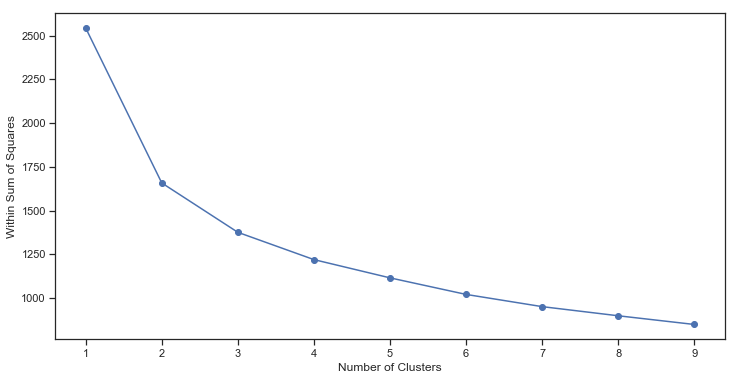

In [38]:
plt.figure(figsize=(12,6))
plt.xlabel('Number of Clusters')
plt.ylabel('Within Sum of Squares')
plt.xticks(np.arange(min(clusters_df.num_clusters), 
                     max(clusters_df.num_clusters)+1, 
                     1.0))
plt.plot( clusters_df.num_clusters, 
         clusters_df.cluster_wss, 
         marker = "o" )

I think just 3 clusterings is optimal and easy to classify

In [39]:
raw.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.565896,0.484561,0.976070,0.439132,-1.508418,0.643001,0.407685
1,1.448652,0.565896,0.088766,0.990718,0.650291,0.134683,0.764127,0.623967
2,1.448652,0.565896,0.017680,0.890970,0.453606,0.377147,0.802243,1.758420
3,-0.690297,0.565896,0.515656,-0.957573,-0.083722,1.140446,-0.324282,0.629110
4,1.448652,0.565896,0.876512,0.439720,0.395003,0.756909,0.405285,1.442246


In [42]:
## Profiling the clusters

clusterer = KMeans(n_clusters=3, random_state=10)
cluster_labels = clusterer.fit_predict(data_pca)
cluster_labels
raw['Clusters'] = cluster_labels

clus_profile = raw.iloc[:,:].groupby(['Clusters'],
                       as_index=False).mean()
clus_profile

,Clusters,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0,1.345154,0.142246,-0.061242,0.855762,0.930978,-0.242567,1.062074,0.254078
1,1,-0.670118,0.441844,0.222520,-0.418741,-0.479552,0.248757,-0.508808,0.042860
2,2,-0.616540,-2.073255,0.246518,-0.298276,-0.418177,0.279581,-0.372478,0.040838


We can observe the customers are clustered

Conclusion

I used the given dataset to form PCA with which i can increase signal and reduce noise. Mainly to also reduce multicolinearity.

With optimal number of PCA's, i formed the clustering with K-means & through elbow method i got optimal number.

That means i have divided the customers into 3 groups from given data
